In [84]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import accuracy_score, zero_one_loss
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
seed = 1234
np.random.seed(seed)
import warnings
warnings.filterwarnings('ignore')
# fetch dataset 
DB = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X = DB.data.features 
y = DB.data.targets 






In [86]:
from sklearn.preprocessing import LabelEncoder

X.fillna('Unknown', inplace=True)

label_encoder = LabelEncoder()

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])
        print(X[column], ": ", list(label_encoder.classes_)) 

print(X.info())


0         2
1         2
2         0
3         2
4         2
         ..
101761    0
101762    0
101763    2
101764    2
101765    2
Name: race, Length: 101766, dtype: int32 :  ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'Unknown']
0         0
1         0
2         0
3         1
4         1
         ..
101761    1
101762    0
101763    1
101764    0
101765    1
Name: gender, Length: 101766, dtype: int32 :  ['Female', 'Male', 'Unknown/Invalid']
0         0
1         1
2         2
3         3
4         4
         ..
101761    7
101762    8
101763    7
101764    8
101765    7
Name: age, Length: 101766, dtype: int32 :  ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
0         1
1         1
2         1
3         1
4         1
         ..
101761    1
101762    1
101763    1
101764    1
101765    1
Name: weight, Length: 101766, dtype: int32 :  ['>200', 'Unknown', '[0-25)', '[100-125)', '[125-150)', '[150-175)', '

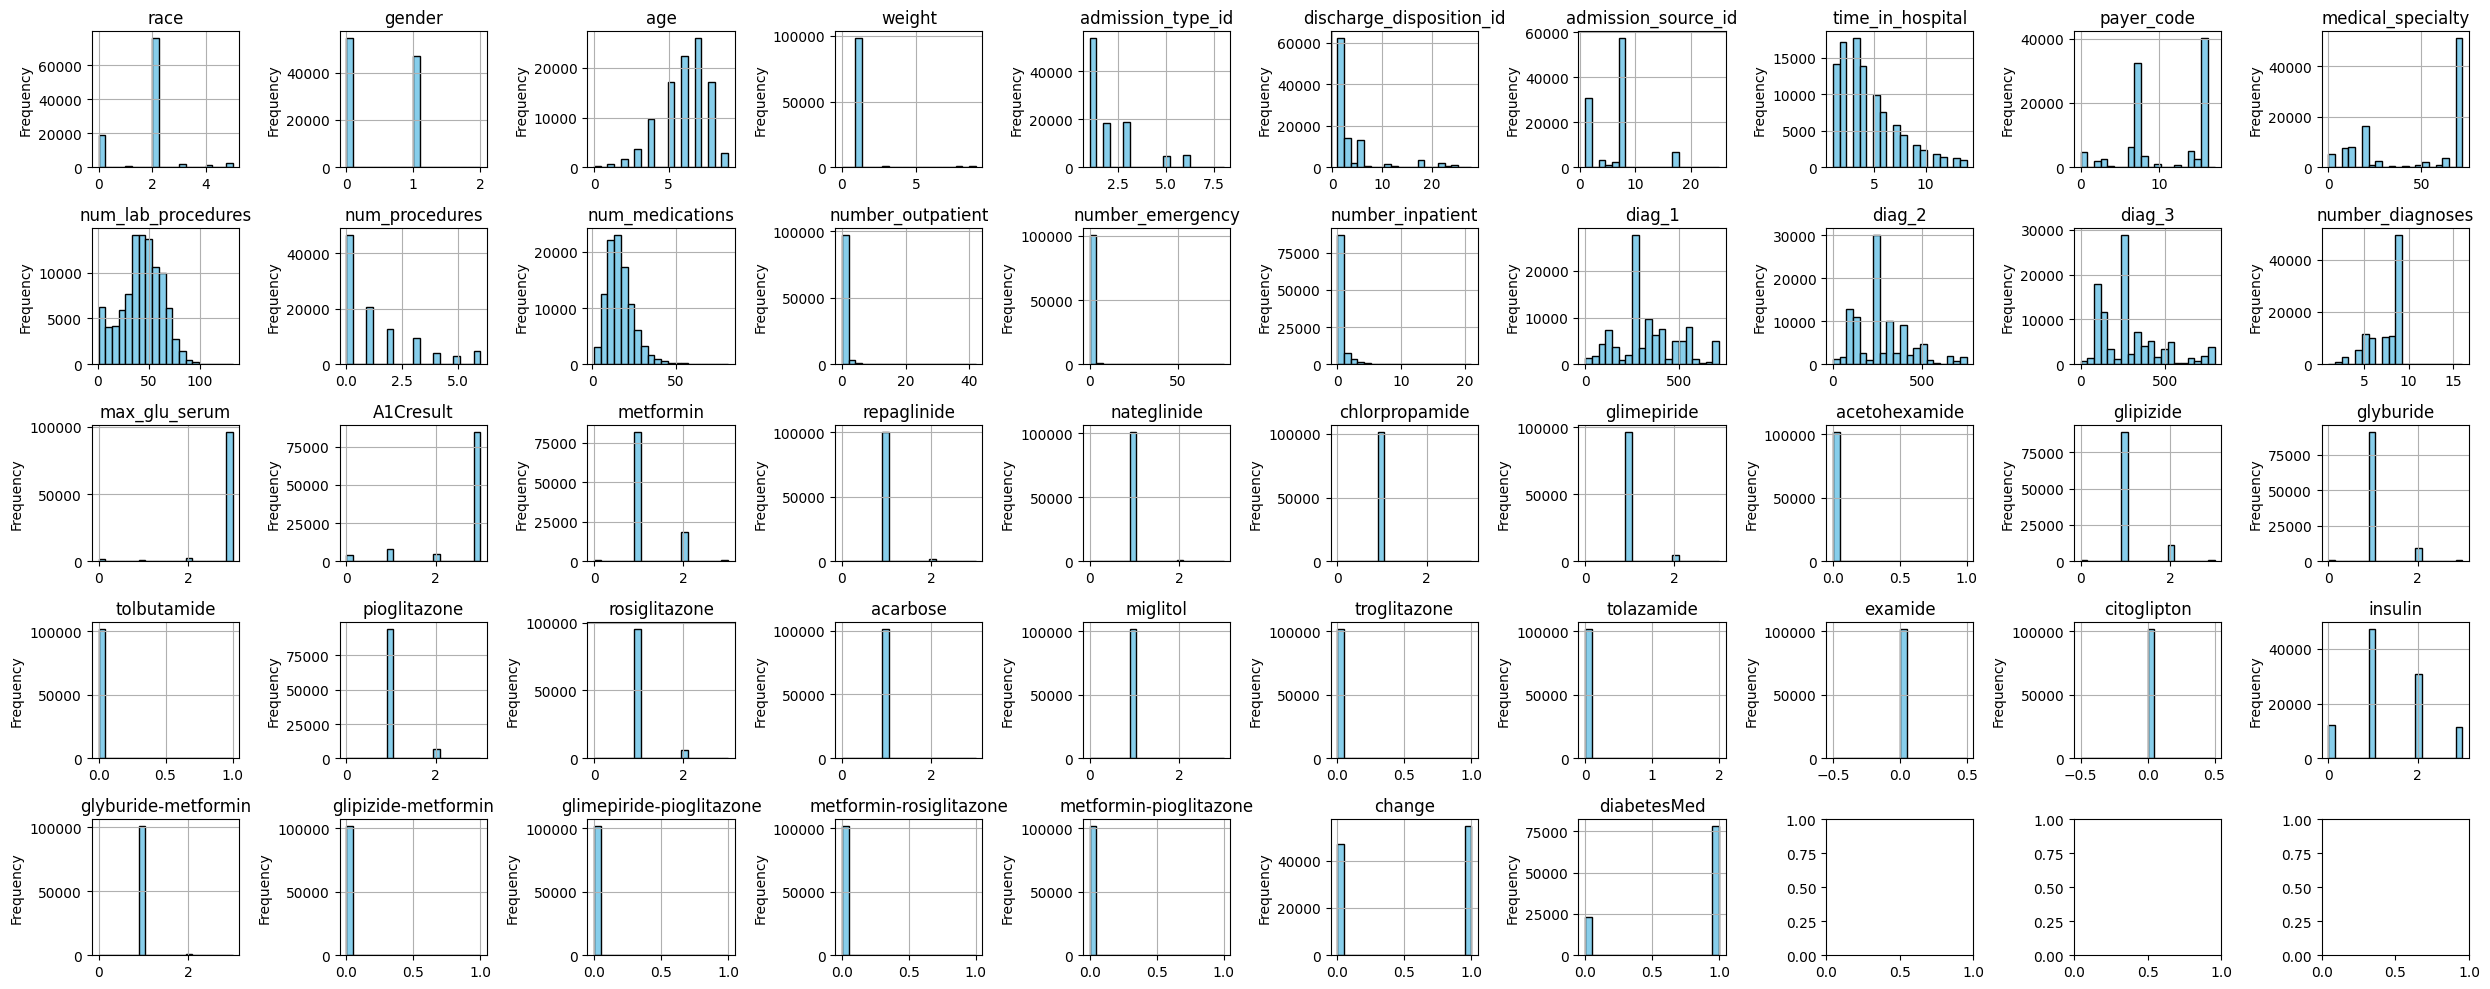

In [87]:
# Assuming X is a DataFrame and has columns as features
num_rows, num_cols = 5, 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 10))

for i, column in enumerate(X.columns):
    ax = axes[i // num_cols, i % num_cols]
    X[column].plot(kind='hist', ax=ax, bins=20, edgecolor='black', color='skyblue')
    ax.set_title(column)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [88]:
features_to_remove = ['weight', 'payer_code', 'diag_1', 'diag_2', 'diag_3', 'discharge_disposition_id', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'glyburide-metformin', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
'citoglipton', 'max_glu_serum', 'nateglinide', 'chlorpropamide', 'repaglinide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone']
#weight
X = X.drop(columns=features_to_remove)

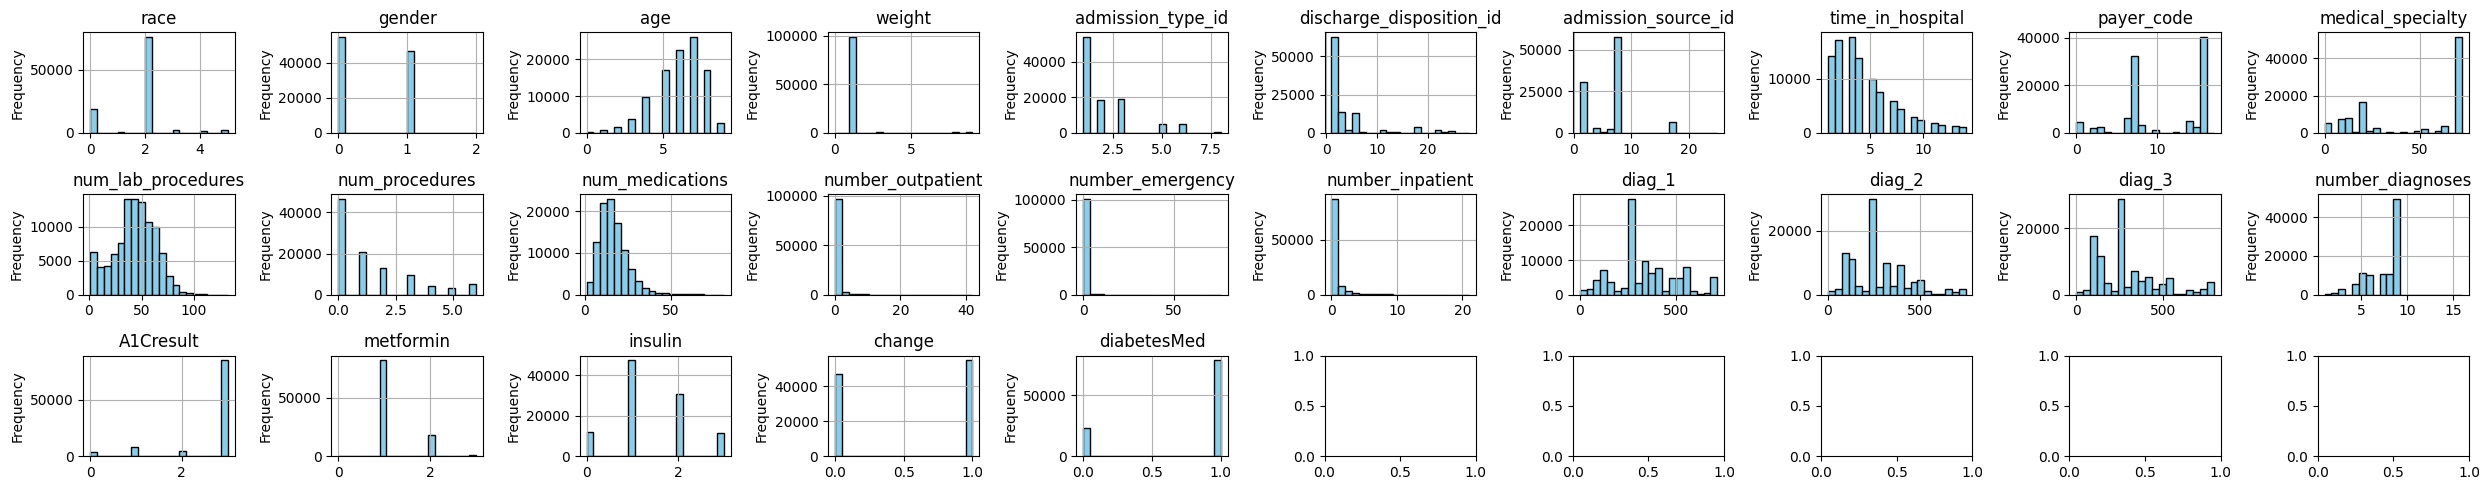

In [89]:
# Assuming X is a DataFrame and has columns as features
num_rows, num_cols = 3, 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5))

for i, column in enumerate(X.columns):
    ax = axes[i // num_cols, i % num_cols]
    X[column].plot(kind='hist', ax=ax, bins=20, edgecolor='black', color='skyblue')
    ax.set_title(column)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [90]:
min_X = np.min(X, axis=0)
max_X = np.max(X, axis=0)
variance_X = np.var(X, axis=0)
mean_X = np.mean(X, axis=0)

for i in range(X.shape[1]):
    print(f"Feature {i+1} - Min: {min_X[i]}, Max: {max_X[i]}, Variance: {variance_X[i]}, Mean: {mean_X[i]}")

Feature 1 - Min: 0, Max: 5, Variance: 0.9701936780556161, Mean: 1.732788947192579
Feature 2 - Min: 0, Max: 2, Variance: 0.24864844947999587, Mean: 0.46244325216673543
Feature 3 - Min: 0, Max: 9, Variance: 2.5410780935796833, Mean: 6.096702238468644
Feature 4 - Min: 0, Max: 9, Variance: 1.3158957236715623, Mean: 1.1913605722933003
Feature 5 - Min: 1, Max: 8, Variance: 2.089168810921833, Mean: 2.024006053102215
Feature 6 - Min: 1, Max: 28, Variance: 27.879873842307212, Mean: 3.7156417664052825
Feature 7 - Min: 1, Max: 25, Variance: 16.51659072630421, Mean: 5.754436648782501
Feature 8 - Min: 1, Max: 14, Variance: 8.91078082108426, Mean: 4.395986871843248
Feature 9 - Min: 0, Max: 17, Variance: 26.666750245496214, Mean: 10.611667944107069
Feature 10 - Min: 0, Max: 72, Variance: 774.8384969219848, Mean: 46.054792366802275
Feature 11 - Min: 1, Max: 132, Variance: 387.07672627733086, Mean: 43.09564098028811
Feature 12 - Min: 0, Max: 6, Variance: 2.909748857193247, Mean: 1.339730361810428
Featu

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=seed)

max_depth = 6


dectree = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=seed)
dectree.fit(Xtr, ytr)

ytr_pred = dectree.predict(Xtr)
yte_pred = dectree.predict(Xte)

error_rate_train = 1 - accuracy_score(ytr, ytr_pred)
print(f"Training Error Rate: ", error_rate_train)

error_rate_validation = 1 - accuracy_score(yte, yte_pred)
print(f"Validation Error Rate: ", error_rate_validation)

Training Error Rate:  0.4211664128138358
Validation Error Rate:  0.41864007074776455


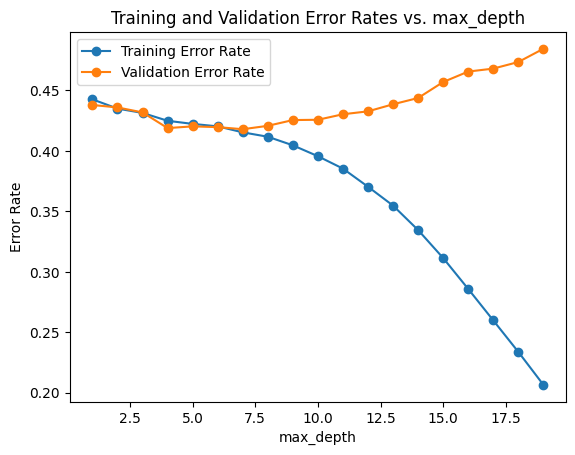

In [92]:
max_depths = range(1,20)
error_rates_tr = []
error_rates_te= []

for d in max_depths:
    dectree = DecisionTreeClassifier(max_depth=d, criterion='gini', random_state=seed)
    dectree.fit(Xtr, ytr)
    
    ytr_pred = dectree.predict(Xtr)
    yte_pred = dectree.predict(Xte)
    
    error_rate_train = 1 - accuracy_score(ytr, ytr_pred)
    error_rates_tr.append(error_rate_train)
    
    error_rate_validation = 1 - accuracy_score(yte, yte_pred)
    error_rates_te.append(error_rate_validation)

# Plot the results
plt.plot(max_depths, error_rates_tr, label='Training Error Rate', marker='o')
plt.plot(max_depths, error_rates_te, label='Validation Error Rate', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')
plt.title('Training and Validation Error Rates vs. max_depth')
plt.legend()
plt.show()

In [93]:
for i, j in enumerate(error_rates_te):
    print("max depth: ", i, " error rate: ", j)

print(min(error_rates_te))

# Best Max Depth  == 6

max depth:  0  error rate:  0.4379974452196128
max depth:  1  error rate:  0.4359830991451312
max depth:  2  error rate:  0.4318561462120468
max depth:  3  error rate:  0.41888572270806723
max depth:  4  error rate:  0.42031050407782256
max depth:  5  error rate:  0.4196718089810356
max depth:  6  error rate:  0.41795224525891717
max depth:  7  error rate:  0.42075267760636725
max depth:  8  error rate:  0.4255183256362386
max depth:  9  error rate:  0.42576397759654117
max depth:  10  error rate:  0.4303331040581704
max depth:  11  error rate:  0.43274049326913633
max depth:  12  error rate:  0.4385870099243392
max depth:  13  error rate:  0.4437948314827552
max depth:  14  error rate:  0.4570109069470374
max depth:  15  error rate:  0.46565785594969045
max depth:  16  error rate:  0.46811437555271695
max depth:  17  error rate:  0.47356784907143556
max depth:  18  error rate:  0.48452392650093346
0.41795224525891717


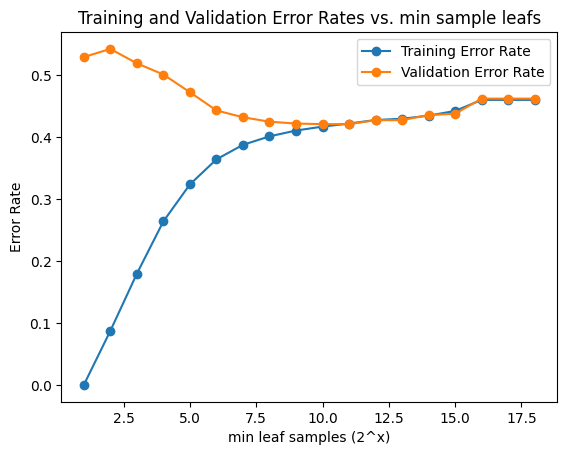

In [94]:
min_samples_leafs = [2**0, 2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14, 2**15, 2**16, 2**17]
min_samples = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
error_rates_tr = []
error_rates_te= []

for m in min_samples_leafs:
    dectree = DecisionTreeClassifier(max_depth=100, min_samples_leaf = m ,criterion='gini', random_state=seed)
    dectree.fit(Xtr, ytr)
    
    ytr_pred = dectree.predict(Xtr)
    yte_pred = dectree.predict(Xte)
    
    error_rate_train = 1 - accuracy_score(ytr, ytr_pred)
    error_rates_tr.append(error_rate_train)
    
    error_rate_validation = 1 - accuracy_score(yte, yte_pred)
    error_rates_te.append(error_rate_validation)

# Plot the results
plt.plot(min_samples, error_rates_tr, label='Training Error Rate', marker='o')
plt.plot(min_samples, error_rates_te, label='Validation Error Rate', marker='o')
plt.xlabel('min leaf samples (2^x)')
plt.ylabel('Error Rate')
plt.title('Training and Validation Error Rates vs. min sample leafs')
plt.legend()
plt.show()


In [95]:
for i, j in enumerate(error_rates_te):
    print("min samples: 2^", i, " error rate: ", j)

print(min(error_rates_te))

# best Min Leaf Samples == 2^10

min samples: 2^ 0  error rate:  0.5296747568045592
min samples: 2^ 1  error rate:  0.5427925714847204
min samples: 2^ 2  error rate:  0.5195047656480298
min samples: 2^ 3  error rate:  0.5014247813697553
min samples: 2^ 4  error rate:  0.4728308931905276
min samples: 2^ 5  error rate:  0.443401788346271
min samples: 2^ 6  error rate:  0.43239658052471264
min samples: 2^ 7  error rate:  0.42522354328387546
min samples: 2^ 8  error rate:  0.42222658936818314
min samples: 2^ 9  error rate:  0.42129311191903307
min samples: 2^ 10  error rate:  0.4212439815269726
min samples: 2^ 11  error rate:  0.4276309324948413
min samples: 2^ 12  error rate:  0.4277291932789624
min samples: 2^ 13  error rate:  0.4359830991451312
min samples: 2^ 14  error rate:  0.4379974452196128
min samples: 2^ 15  error rate:  0.46251351085781667
min samples: 2^ 16  error rate:  0.46251351085781667
min samples: 2^ 17  error rate:  0.46251351085781667
0.4212439815269726


In [96]:
label_encoder = LabelEncoder()

for column in y.columns:
    if y[column].dtype == 'object':
        y[column] = label_encoder.fit_transform(y[column])
        print(y[column], ": ", list(label_encoder.classes_)) 

label_encoder = LabelEncoder()

for column in ytr.columns:
    if ytr[column].dtype == 'object':
        ytr[column] = label_encoder.fit_transform(ytr[column])
        print(ytr[column], ": ", list(label_encoder.classes_)) 

label_encoder = LabelEncoder()

for column in yte.columns:
    if yte[column].dtype == 'object':
        yte[column] = label_encoder.fit_transform(yte[column])
        print(yte[column], ": ", list(label_encoder.classes_)) 

print(ytr.info())


0         2
1         1
2         2
3         2
4         2
         ..
101761    1
101762    2
101763    2
101764    2
101765    2
Name: readmitted, Length: 101766, dtype: int32 :  ['<30', '>30', 'NO']
50908    1
68819    1
57012    2
32605    2
59700    2
        ..
89460    2
60620    2
34086    2
58067    1
92975    1
Name: readmitted, Length: 81412, dtype: int32 :  ['<30', '>30', 'NO']
28004    2
81934    2
12445    2
42240    1
35502    2
        ..
3916     1
44239    1
41031    2
31942    1
2724     2
Name: readmitted, Length: 20354, dtype: int32 :  ['<30', '>30', 'NO']
<class 'pandas.core.frame.DataFrame'>
Index: 81412 entries, 50908 to 92975
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   readmitted  81412 non-null  int32
dtypes: int32(1)
memory usage: 954.0 KB
None


In [97]:
m,n = Xtr.shape
classifiers = []
numLearners = 100
msl = 2
md = 15

for b in range(numLearners):
    ind = (m * np.random.rand(m)).astype(int)
    Xb, Yb = Xtr.iloc[ind, :], ytr.iloc[ind]
    tree = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl, criterion='gini', random_state = seed)
    tree.fit(Xb, Yb)
    classifiers.append(tree)

In [98]:
from sklearn.ensemble import RandomForestClassifier

[[2.]
 [2.]
 [2.]
 ...
 [2.]
 [1.]
 [1.]]
predict1:  [2 2 2 ... 2 1 1]
0.4648226392846615
[[2. 2. 2. 2. 1.]
 [2. 2. 2. 2. 1.]
 [2. 2. 2. 2. 2.]
 ...
 [2. 2. 2. 1. 2.]
 [1. 2. 2. 2. 2.]
 [1. 1. 2. 0. 1.]]
predict1:  [2 2 2 ... 2 2 1]
0.43863614031639975
[[2. 2. 2. ... 1. 2. 1.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 1. 1. 2.]
 [1. 2. 2. ... 2. 2. 2.]
 [1. 1. 2. ... 2. 2. 2.]]
predict1:  [2 2 2 ... 2 2 1]
0.42871180112017293
[[2. 2. 2. ... 2. 2. 1.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [1. 2. 2. ... 2. 2. 2.]
 [1. 1. 2. ... 1. 2. 2.]]
predict1:  [2 2 2 ... 2 2 2]
0.42591136877272284
[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 1. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 1. 2. 2.]
 [1. 2. 2. ... 2. 2. 2.]
 [1. 1. 2. ... 2. 1. 1.]]
predict1:  [2 2 2 ... 2 2 1]
0.42301267564115164
[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 1. 2. 1.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [1. 2. 2. ... 2. 2. 2.]
 [

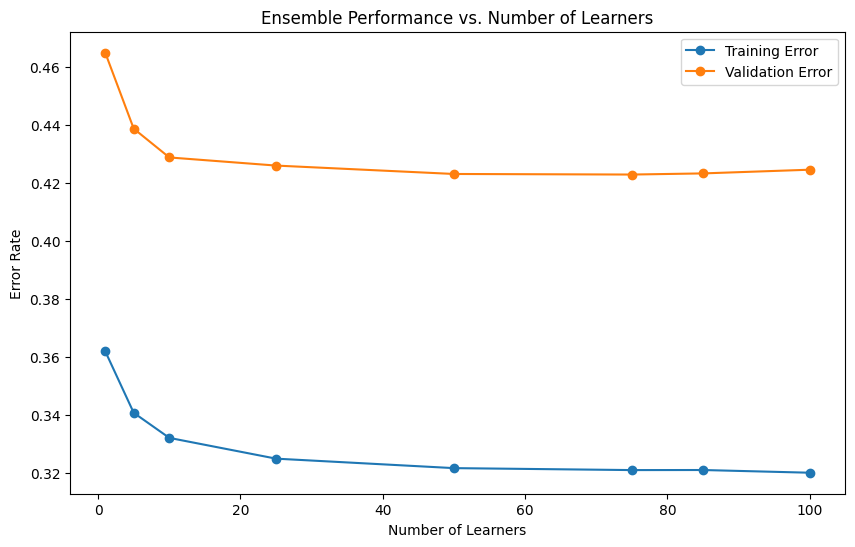

In [99]:
ensemble_num = [1, 5, 10, 25, 50, 75, 85, 100]

train_errors = []
val_errors = []

def calculate_mode(arr):
    unique_values, counts = np.unique(arr, return_counts=True)
    mode_index = np.argmax(counts)
    mode = unique_values[mode_index]
    return mode

# Iterate over the specified number of learners
for num_learners in ensemble_num:
    # Use the first num_learners models from the ensemble
    ensemble_subset = classifiers[:num_learners]
    
    mTest = Xtr.shape[0]
    predict = np.zeros((mTest, num_learners))
    
    for i in range(num_learners):
        predict[:,i] = ensemble_subset[i].predict(Xtr)
    print(predict)
    predict1 = np.mean(predict, axis=1)
    predict1 = np.round(predict1).astype(int)
    print("predict1: ", predict1)
    #predict1 = [-1 if num < 0 else 1 for num in predict1]
    
    tr_error = 1 - accuracy_score(ytr, predict1)

    train_errors.append(tr_error)
    
    mTest = Xte.shape[0]
    predict = np.zeros((mTest, num_learners))

    for i in range(num_learners):
        predict[:,i] = ensemble_subset[i].predict(Xte)

    predict2 = np.mean(predict, axis=1)
    predict2 = np.round(predict2).astype(int)
    #predict2 = [-1 if num < 0 else 1 for num in predict2]

    te_error = 1 - accuracy_score(yte, predict2)
    print(te_error)

    val_errors.append(te_error)

# Plot the training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(ensemble_num, train_errors, label='Training Error', marker = 'o')
plt.plot(ensemble_num, val_errors, label='Validation Error',  marker = 'o')
plt.xlabel('Number of Learners')
plt.ylabel('Error Rate')
plt.title('Ensemble Performance vs. Number of Learners')
plt.legend()
plt.show()

In [100]:
rf = RandomForestClassifier()
rf.fit(Xtr, ytr)

y_pred = rf.predict(Xte)
accuracy = accuracy_score(yte, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5846025351282303


In [101]:
from sklearn.model_selection import RandomizedSearchCV


In [102]:
param_dist = {'n_estimators': np.random.randint(50,500, size=450),
              'max_depth': np.random.randint(1,100,size = 50),
              'min_samples_leaf': np.random.randint(1, 100, size=50),
              'min_samples_split': np.random.randint(1, 100, size=50),
              'max_features': ['auto', 'sqrt', 'log2']}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist,  
                                 n_iter=5, 
                                 cv=5,
                                 n_jobs=-1)

# Fit the random search object to the data
rand_search.fit(Xtr, ytr)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 3, 87, 69, 99, 26, 54, 42,  9, 75, 54, 13, 34, 19, 93, 24, 89, 45,
       99, 19, 96, 69, 18, 21, 66, 79, 84, 16, 57, 25,  7, 90, 55, 72, 66,
       19, 77, 65, 66, 29,  9, 97, 49, 79, 18, 46, 21, 13, 49, 93, 33]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([59, 16, 13, 56, 32, 32, 34...
       306, 256, 129,  93, 322, 434, 156, 271, 282, 250, 497, 469, 495,
       145, 175, 415, 176, 271, 209, 260, 205, 234, 425, 165, 456,  69,
       137, 376, 116, 285, 428,  85, 295, 178, 127, 261, 280, 432, 174,
       403, 160, 468, 362, 481, 311, 249, 156, 465, 145, 354, 463,  99,
       156, 132, 357, 417, 426, 325, 324, 313, 295,  55, 362, 168, 239,
       495, 101, 233, 356, 169, 385, 182, 277, 210, 447, 440, 312, 403,
       473,  98, 245, 153, 328,  85,  65, 340, 412, 358, 491, 482, 329,
        95, 468, 372, 462, 283, 406, 446, 490])})

In [103]:

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
print(rand_search.best_estimator_)

Best hyperparameters: {'n_estimators': 322, 'min_samples_split': 93, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 93}
RandomForestClassifier(max_depth=93, max_features='log2', min_samples_leaf=7,
                       min_samples_split=93, n_estimators=322)


In [104]:
rf = RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'],
                            min_samples_split = rand_search.best_params_['min_samples_split'],
                            min_samples_leaf = rand_search.best_params_['min_samples_leaf'],
                            max_features=rand_search.best_params_['max_features'],
                            max_depth = rand_search.best_params_['max_depth']
                            )
rf = rand_search.best_estimator_
rf.fit(Xtr, ytr)

y_pred = rf.predict(Xte)
accuracy = accuracy_score(yte, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5899086174707674
